# DSCI 100 - Project Final Report - Group 8, Section 3
## Predicting Newsletter Subscription from Player Age and Playtime
Group Members
- Nick Huang (87451522)
- Kailey Hong (64795990)
- Ian Zhu (82209362)
- Jonathan Yan

Github Link: https://github.com/nhuang07/dsci-100-2025w1-group-8/tree/main

# 1 | Introduction

kailey type stuff here this ur section

# 2 | Methods and Results

## Loading data into R and wrangling

**Loading necessary libraries, setting the seed, reading in player data using link directly from GitHub**

In [1]:
# loading all necessary libraries

library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6)
set.seed(2025)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players_url <- "https://raw.githubusercontent.com/nhuang07/dsci-100-2025w1-group-8/refs/heads/main/data/players.csv"
players <- read_csv(players_url)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


**Tidying the data**

The players dataset is already tidy, so there will be no tidying work done. While the experience and gender variables should be converted to the "factor" type instead of their current types, we will not be using these variables as predictors, so this work will not be shown below.

Instead, we will be showing work for selecting our variables of interest, and converting the "subscribe" variable to a factor type.

In [3]:
players <- players |>
            select(subscribe, played_hours, Age) |>
            mutate(subscribe = as_factor(subscribe)) |>
            na.omit()
head(players)

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17


**Computing summary statistics of the quantitative variables in the "players" dataset**

In [4]:
mean_players <- players |>
                    select(played_hours, Age) |>
                    map_df(mean, na.rm = TRUE)|>
                    mutate(played_hours = round(played_hours, digits = 2)) |>
                    mutate(Age = round(Age, digits = 2))
mean_players 

played_hours,Age
<dbl>,<dbl>
5.9,21.14


## Exploratory visualizations of the distribution of the predictor and response variables

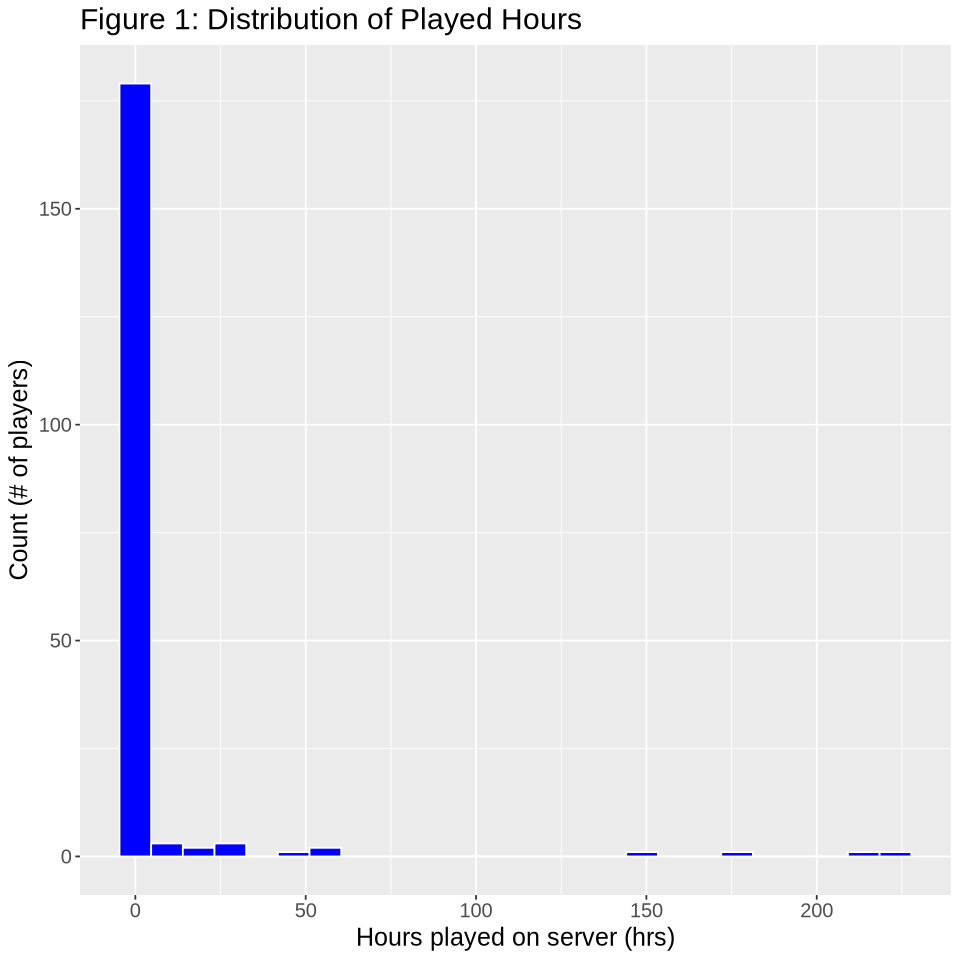

In [5]:
# distribtuion of played hours plot

options(repr.plot.width = 8, repr.plot.height = 8)

played_hours_plot <- ggplot(players, aes(x = played_hours)) +
                      geom_histogram(bins = 25, fill = "blue", color = "white") +
                      labs(title = "Figure 1: Distribution of Played Hours", 
                           x = "Hours played on server (hrs)", 
                           y = "Count (# of players)") +
                      theme(text = element_text(size = 15))
played_hours_plot

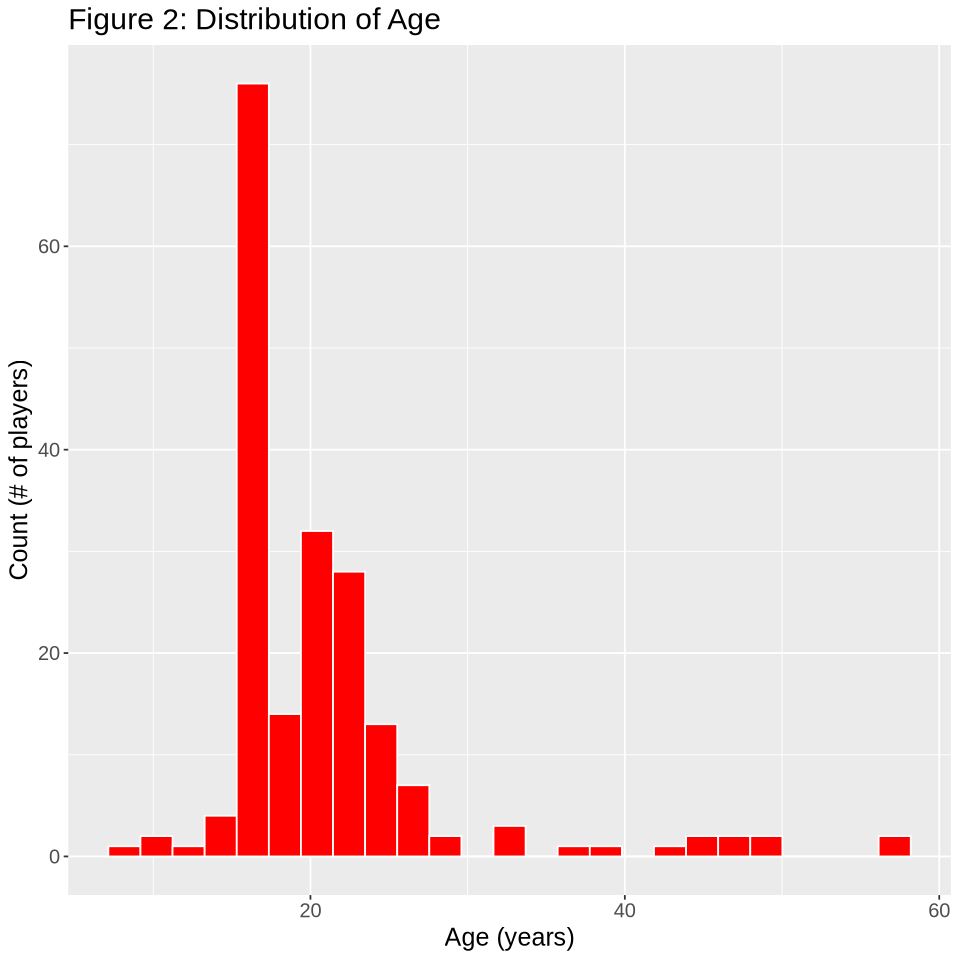

In [6]:
# distribution of age plot

options(repr.plot.width = 8, repr.plot.height = 8)

age_plot <- ggplot(players, aes(x = Age)) +
                      geom_histogram(bins = 25, fill = "red", color = "white") +
                      labs(title = "Figure 2: Distribution of Age", 
                           x = "Age (years)", 
                           y = "Count (# of players)") +
                      theme(text = element_text(size = 15))
age_plot

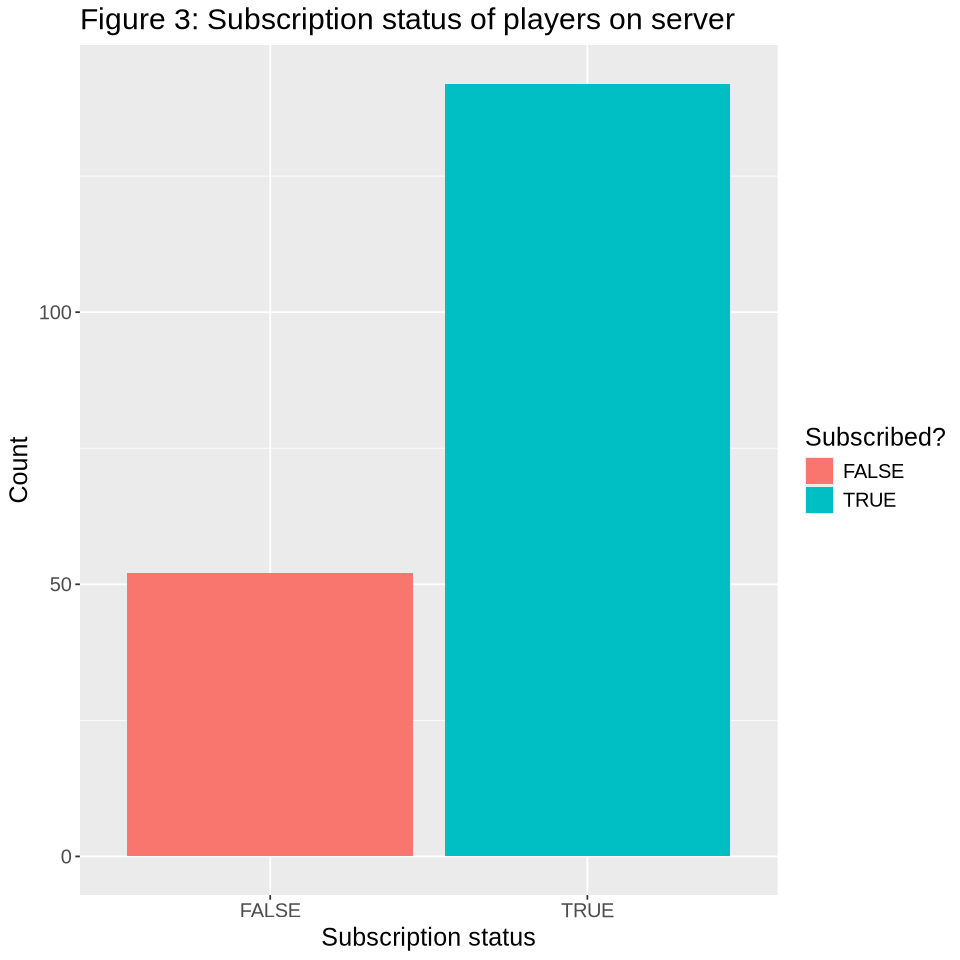

In [7]:
# bar plot of subscription, with height of bars being the # of each

options(repr.plot.width = 8, repr.plot.height = 8)

subscription_plot <- ggplot(players, aes(x = subscribe, fill = subscribe)) +
                        geom_bar() +
                        labs(title = "Figure 3: Subscription status of players on server",
                             x = "Subscription status",
                             y = "Count",
                             fill = "Subscribed?") +
                        theme(text = element_text(size = 15))
subscription_plot

## Exploratory visualizations of age and hours played as predictors for the subscription status

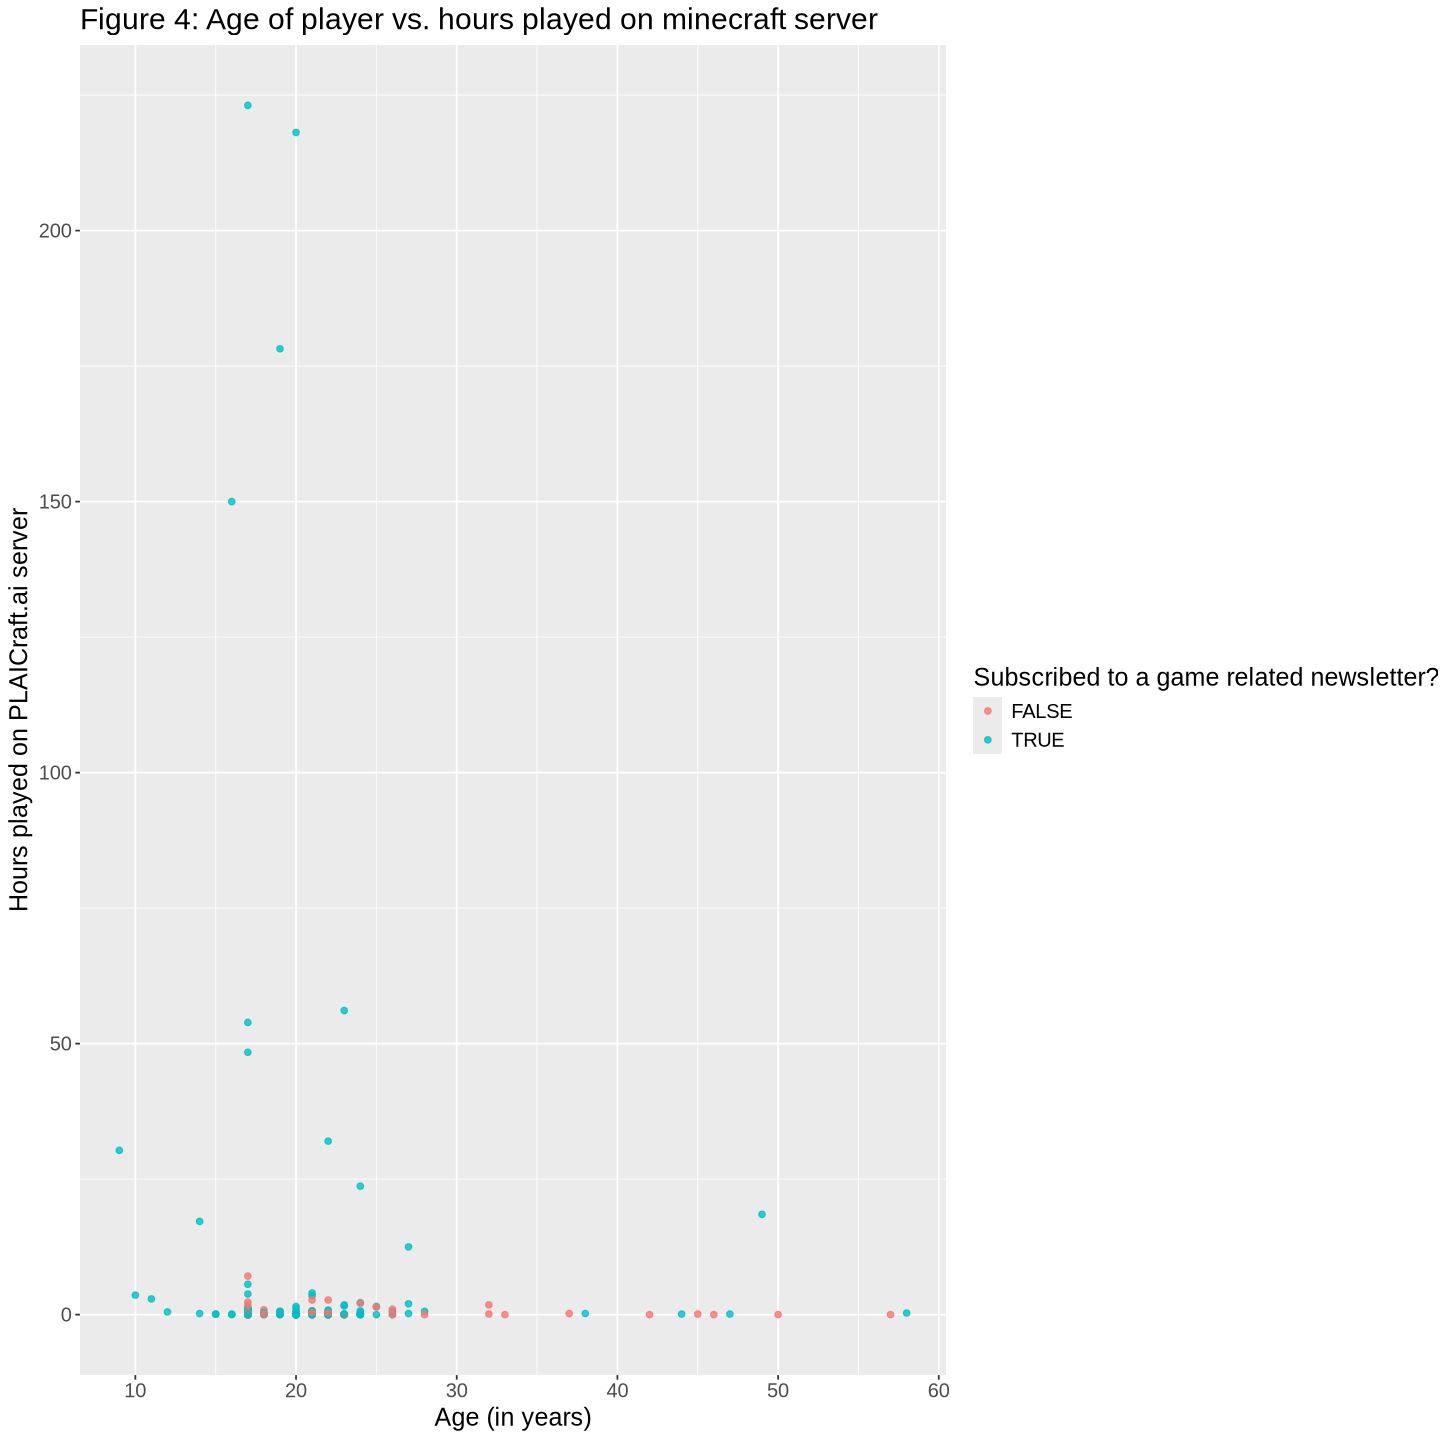

In [8]:
# plot of age on the x-axis and played_hours on the y-axis, coloured in with "subscribe" variable
options(repr.plot.width = 12, repr.plot.height = 12)
age_to_played_hours_plot <- ggplot(players, aes(x = Age, y = played_hours, color = subscribe)) +
                                geom_point(alpha = 0.8) +
                                labs(title = "Figure 4: Age of player vs. hours played on minecraft server",
                                     x = "Age (in years)",
                                     y = "Hours played on PLAICraft.ai server",
                                     color = "Subscribed to a game related newsletter?") +
                                theme(text = element_text(size = 15))
age_to_played_hours_plot

## Performing the data analysis

From this point on, we intend to use the K-nearest neighbors algorithm to perform our data analysis, and determine an answer to our original question. In this model, we will be using the "played_hours" and "age" variables as our predictors, and whether or not they are subscribed to a game related newsletter as our response. 

**However, the k-nearest neighbors has a few flaws and sensitivities that we must address, especially with a dataset like ours.**

Firstly, as seen from the distribution graphs of our variables of interest above, there is lots of disparity within the played horus plot, as well as the number of players subscribed vs. not subscribed. This is further seen through our graph with all 3 of our variables, where we see a large concentration of the points in the very bottom of the graph, and a visibly noticeable difference between data points with a subscribed and not subscribed player.

The K-NN nearest neighbors algorithm often has many weaknesses, including but not limited to:
- sensitivity to class imbalance (which would likely be a problem in this case)
- inability to predict with irrelevent or differently scaled variables
- not enough data points in a small dataset leading to overfitting, less pattern recognition, and increased sensitivity to class imbalance

**Some can be minimized through R functions, such as "step_upsample" or previously discussed standardization methods. However, limitations and weaknesses still need to be considered and discussed.**

Additionally, for our dataset, we will choose not to use the step_upsample function to account for our class imbalance. Initially, when looking at our classes, there is a visible class imbalance between players who have subscribed, and have not subscribed (around a 2.5:1 ratio), making it seem like an obvious choice to upsample one to be equal to the other. However, doing so might lose the natural prevalence of each category being assigned, as maybe, in this case, the imbalance between players who have subscribed and have not subscribed is naturally occurring. In reality, the ratio of subscribed players to unsubscribed players is very unlikely to be equal, and this dataset could be capturing that in some way. As a result, we will keep the current proportions of the subscription variable.

To compare and select the best model for K-NN classification, we could use taught in-class methods, such as picking and selecting the best parameter "K." This would be done through:
1. Splitting data into training and testing, with a 70-30 train-test split.
2. Standardizing the data, creating the recipe, and creating a model specification to perform cross validation with - no upsampling for reasons mentioned before
5. Perform 5 fold cross-validation, and evaluate the model's performance using one of the metrics covered in class
6. Pick the K that has the best performance according to the chosen metric
7. Use that value of K in order to predict the class of any future new observations

These steps will all be shown below:

**Splitting data into training and testing, with a 70-30 train-test split**

In [9]:
players_split <- initial_split(players, prop = 0.7, strata = subscribe)
players_training <- training(players_split)
players_testing <- testing(players_split)

players_training
players_testing

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
FALSE,0.0,17
FALSE,0.0,22
FALSE,0.1,17
⋮,⋮,⋮
TRUE,0,17
TRUE,0,17
TRUE,0,20


subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
FALSE,0.0,21
TRUE,0.1,47
TRUE,1.6,23
⋮,⋮,⋮
FALSE,0.1,18
TRUE,0.0,17
FALSE,0.3,22


**Standardizing the data, creating the recipe, and creating a model specification to be used for cross validation**

In [10]:
players_recipe <- recipe(subscribe ~., data = players_training) |>
            step_center(all_predictors()) |>
            step_scale(all_predictors())

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                    set_engine("kknn") |>
                    set_mode("classification")

**Creating the workflow for the 5-fold cross validation, and collecting the metrics**

In [23]:
players_vfold <- vfold_cv(players_training, v = 5, strata = subscribe)

players_tune_workflow <- workflow() |>
                    add_recipe(players_recipe) |>
                    add_model(players_spec) |>
                    tune_grid(resamples = players_vfold) |>
                    collect_metrics()
players_tune_workflow

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.5330891,5,0.04347469,Preprocessor1_Model01
2,roc_auc,binary,0.5552021,5,0.05301472,Preprocessor1_Model01
3,accuracy,binary,0.5259666,5,0.04560619,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
13,roc_auc,binary,0.5434868,5,0.04547119,Preprocessor1_Model09
14,accuracy,binary,0.7120269,5,0.03521316,Preprocessor1_Model10
14,roc_auc,binary,0.5216259,5,0.03700336,Preprocessor1_Model10


**Selecting which metric to use**

To answer the question of which metric to use, we should first go back to our original question:

*Can a player's age and number of hours played on the server predict whether they are subscribed to any game related newsletters?*

The main aspect of this question is inquiring about the predictive power of a player's age and number of hours played. As a result, accounting for false positives or false negatives, such as in precision or recall, isn't really necessary in our situation. The accuracy metric will be sufficient enough, as it gives us a general idea of the overall correctness, and overall predictive power of the predictors we have selected.

Therefore, we will be filtering for accuracy, and choosing our value of K off of the highest accuracy value.


In [20]:
best_neighbor_players <- players_tune_workflow |>
                    filter(.metric == "accuracy") |>
                    arrange(desc(mean)) |>
                    select(neighbors) |>
                    slice(1) |>
                    pull()
best_neighbor_players

[1] 12

**Creating new model specification, workflow, and fit with our newly found value of K = 15**

In [26]:
players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 15) |>
                set_engine("kknn") |>
                set_mode("classification")

players_best_fit <- workflow() |>
                add_recipe(players_recipe) |>
                add_model(players_best_spec) |>
                fit(data = players_training)

**Using our new model on our testing set, producing a table, as well as the accuracy of our model**

In [27]:
players_predictions <- predict(players_best_fit, players_testing) |>
                    bind_cols(players_testing)

players_metrics <- metrics(players_predictions, truth = subscribe, estimate = .pred_class) |>
                filter(.metric == "accuracy")

players_predictions
players_metrics

.pred_class,subscribe,played_hours,Age
<fct>,<fct>,<dbl>,<dbl>
TRUE,FALSE,0.0,21
TRUE,TRUE,0.1,47
TRUE,TRUE,1.6,23
⋮,⋮,⋮,⋮
FALSE,FALSE,0.1,18
TRUE,TRUE,0.0,17
TRUE,FALSE,0.3,22


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6949153


## Creating visualization of our data analysis

Lastly, we will be creating 3 visualizations for our model - a confusion matrix, an accuracy vs. K graph, and the plot with all of our variables of interest.

# 3 | Discussion

jon write ur stuff here

# 4 | References

anyone add to this when necessary